In [8]:
# Загрузка модулей

import tensorflow as tf
#tf.enable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Загрузка моделей VGGface
! pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to c:\users\frolov\appdata\local\temp\pip-req-build-zcftikxf
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git 'C:\Users\frolov\AppData\Local\Temp\pip-req-build-zcftikxf'


In [30]:
# Загрузка библиотеки для удобного определения пути к файлам
import pathlib
from pathlib import Path

#Получаем строку, содержащую путь к рабочей директории:
work_path = pathlib.Path.cwd()

In [31]:
# Загрузка библиотеки для удобного определения пути к файлам
import pathlib
from pathlib import Path

#Получаем строку, содержащую путь к рабочей директории:
work_path = pathlib.Path.cwd()

In [32]:
print(work_path)

C:\Users\frolov\02_Graduation_project


In [33]:
# сохраним путь к csv файлу в переменной data_path
data_path = Path(work_path, 'csv_files', 'train.csv')

In [34]:
data_path

WindowsPath('C:/Users/frolov/02_Graduation_project/csv_files/train.csv')

In [35]:
# Загружаем данные из csv файла в переменную data
data = pd.read_csv(data_path, index_col=0)

In [36]:
# Создание датасета
data.head(5)

,image_path,emotion
0,./train/anger/0.jpg,anger
1,./train/anger/1.jpg,anger
2,./train/anger/10.jpg,anger
3,./train/anger/100.jpg,anger
4,./train/anger/1000.jpg,anger


In [37]:
# Список уникальных названий эмоций в датасете
data['emotion'].unique()

array(['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise', 'uncertain'], dtype=object)

In [38]:
# Создание словаря для создания колонки с нумерацией эмоций
emotions = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise', 'uncertain']
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
res = dict(zip(emotions, numbers))
print(res)

{'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7, 'uncertain': 8}


In [39]:
# Добавляем колонку с присвоенными каждой эмоции номером
data['numeration'] = data['emotion'].apply(lambda x: res.get(x))

In [40]:
data.head()

,image_path,emotion,numeration
0,./train/anger/0.jpg,anger,0
1,./train/anger/1.jpg,anger,0
2,./train/anger/10.jpg,anger,0
3,./train/anger/100.jpg,anger,0
4,./train/anger/1000.jpg,anger,0


In [41]:
# Дополнительная проверка соответствия нумерации эмоций
data.loc[data['emotion'] == 'uncertain']

,image_path,emotion,numeration
44119,./train/uncertain/0.jpg,uncertain,8
44120,./train/uncertain/1.jpg,uncertain,8
44121,./train/uncertain/10.jpg,uncertain,8
44122,./train/uncertain/100.jpg,uncertain,8
44123,./train/uncertain/1000.jpg,uncertain,8
...,...,...,...
50041,./train/uncertain/995.jpg,uncertain,8
50042,./train/uncertain/996.jpg,uncertain,8
50043,./train/uncertain/997.jpg,uncertain,8
50044,./train/uncertain/998.jpg,uncertain,8


Распечатать фотографию по указанному в датасете пути, чтобы убедится в доступности изображений.

In [42]:
# Указание на путь до изображений

data_folder = Path('C:/Users/frolov/02_Graduation_project/')
#data_folder = Path('C:/Users/Vladimir/02_Graduation_project/')

In [43]:
# Функции для распечатки изображений

def decode_labels(emotion_id):
    return emotion_mapping[int(emotion_id)]
def show_face(image, emotion_id):  # image printouts
    plt.imshow(image)
    emotion = decode_labels(emotion_id)
    plt.title(f'Emotion: {emotion}')

In [44]:
# Нумерация эмоций
emotion_mapping = dict(list(enumerate(('anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise', 'uncertain'))))
print(emotion_mapping)

{0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprise', 8: 'uncertain'}


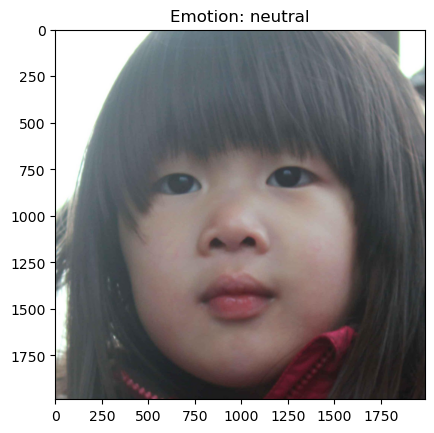

In [80]:
# Распечатка изображения с обозначением эмоции - ТЕСТ
row = data.iloc[np.random.randint(len(data))]
img = plt.imread(str(data_folder / row['image_path']))
show_face(img, row['numeration'])

### Создание модели
for keras-3.0.5 & tensorflow-2.16.1 the way for importing ImageDataGenerator is
* 
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import tensorflow as tf

# import keras.api._v2.keras as keras # try to resolve error No module named 'keras.api._v2'
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator
from keras.src.legacy.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 512
IMG_SHAPE  = 128

dir = Path("C:/Users/frolov/02_Graduation_project/train")

In [99]:
# fine tuning и аугментация данных

# from tensorflow.keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import preprocess_input

image_gen = ImageDataGenerator(preprocessing_function=preprocess_input, # препроцессинг
                               validation_split=0.2, # размер валидационной выборки, так как всё берётся из одной папки
                               rotation_range=40,  # максимальный угол поворота
                               width_shift_range=0.2, # смещение максимум на 20% ширины по горизонтали
                               height_shift_range=0.2, # смещение максимум на 20% высоты по вертикали
                               zoom_range=0.2, # картинка будет увеличена или уменьшена не более чем на 20%
                               horizontal_flip=True, # случайное отражение по горизонтали
                               fill_mode="nearest") # чем заполнять пробелы

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, # размер батча
                                               directory=dir, # директория для доступа к изображениям
                                               shuffle=True, # перемешивать ли данные
                                               target_size=(IMG_SHAPE,IMG_SHAPE), # размер изображения
                                               class_mode="categorical", # тип классового распределения
                                               subset = "training") # указываем, что данная выборка тренировочная

val_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                             directory=dir,
                                             shuffle=False,
                                             target_size=(IMG_SHAPE,IMG_SHAPE),
                                             class_mode='categorical',
                                             subset = "validation") # указываем, что данная выборка валидационная

Found 40040 images belonging to 9 classes.
Found 10007 images belonging to 9 classes.


In [101]:
# загрузка vgg19

IMG_SHAPE = (128, 128, 3)

base_model = keras.applications.VGG19(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

base_model.trainable = False #True
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

# Проблемный блок

In [2]:
# Добавляем в конец слои с выходным, содержащим подходящее число классов

NUM_CLASSES = 9

# model = keras.models.Sequential([ instead of model = keras.Sequential
model = keras.models.Sequential([base_model,
                            tf.keras.layers.GlobalAveragePooling2D(),
                            tf.keras.layers.Dense(512, activation="relu"),
                            tf.keras.layers.Dropout(0.3),
                            tf.keras.layers.Dense(NUM_CLASSES)])


# from_logits как True считаем лосс основываясь на логитах, без функции активации в последнем слое


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [45]:
# Создаём checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint

path = Path('model_emotion') # RENAME  TO model_emotion
path.mkdir(exist_ok=True) # создаём директорию
cpt_filename = 'checkpoint_best.h5'
cpt_path = str(path / cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_accuracy',
                                               verbose = 1, save_best_only=True, mode='max')  # val_binary_accuracy

In [31]:
# Вспрмогательная библиотека для отрисовки графиков
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

In [46]:
# Загрузка необходимых модулей

from keras_vggface import utils
from tensorflow.keras.preprocessing import image

#import tensorflow
from keras.utils.data_utils import get_file

from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.keras.utils.data_utils import get_file

#### Ячейка ниже для базовой модели, в которой все сло VGG19 не обучаемые

In [ ]:
# Обучение модели предсказания эмоций
NUM_EPOCHS = 10  # DON"T FORGET TO CHANGE NUMBER OF EPOCHS TO 10 AND MORE FOR MORE ACCURACY
BATCH_SIZE = 32

history = model.fit(train_data_gen, epochs = NUM_EPOCHS, validation_data=val_data_gen,
               callbacks=[PlotLossesCallback(), checkpoint], steps_per_epoch=25)

### Здесь проводим эксперименты с количеством обучаемых слоёв и количеством эпох

In [47]:
# Возвращаем базовой модели возможность обучаться
base_model.trainable = True
print("Количество слоев в базовой модели: ", len(base_model.layers))

Количество слоев в базовой модели:  22


In [48]:
# Определим количество слоёв, которые будут обучаться, остальные заморозим

fine_tune_at = 20
# все слои до fine_tune_at заморозим и обучать будем оставшиеся (Количество слоев в базовой модели минус fine_tune_at)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

In [49]:
# Компиляция модели

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 20,291,657
Trainable params: 2,627,081
Non-trainable params: 17,664,576
__________________________________

In [51]:
# Указываем количество эпох и размер батча для обучение модели предсказания эмоций
NUM_EPOCHS = 10  # DON"T FORGET TO CHANGE NUMBER OF EPOCHS TO 10 AND MORE FOR MORE ACCURACY
BATCH_SIZE = 32

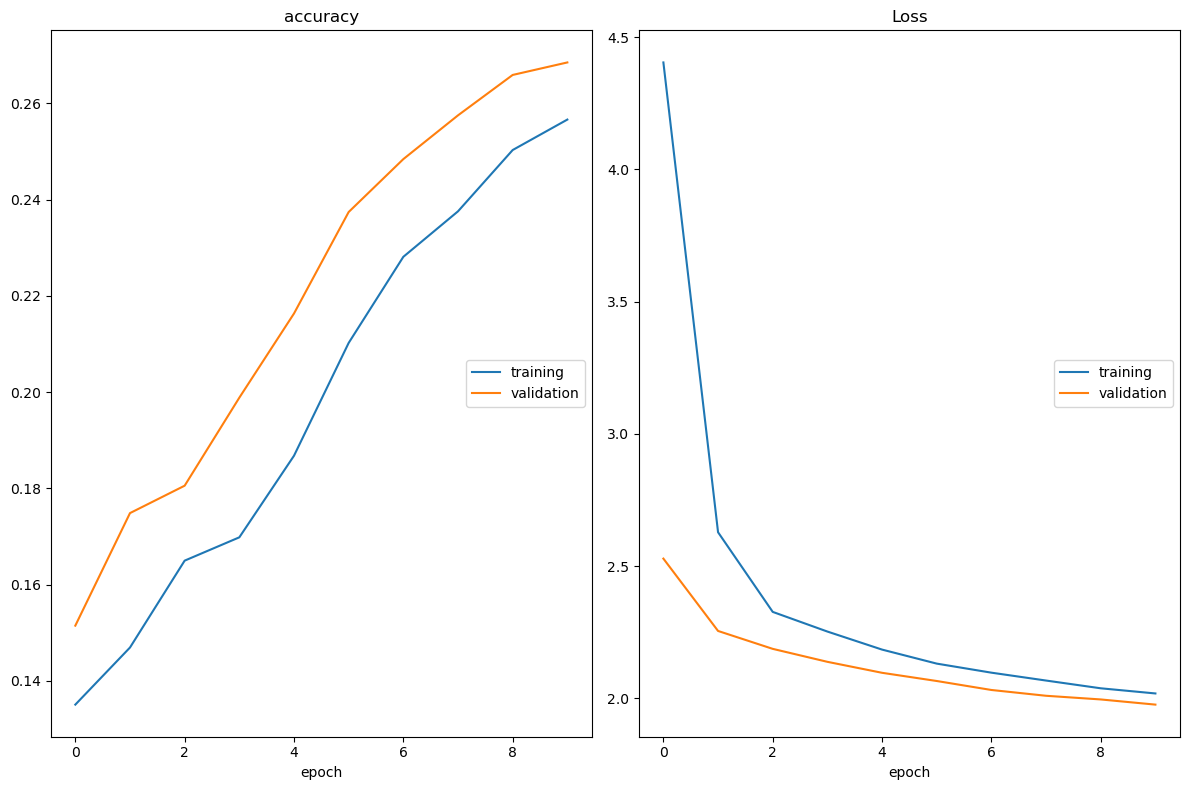

accuracy
	training         	 (min:    0.135, max:    0.257, cur:    0.257)
	validation       	 (min:    0.151, max:    0.269, cur:    0.269)
Loss
	training         	 (min:    2.019, max:    4.405, cur:    2.019)
	validation       	 (min:    1.977, max:    2.529, cur:    1.977)

Epoch 10: val_accuracy improved from 0.26591 to 0.26851, saving model to model_emotion\checkpoint_best.h5
25/25 [==============================] - 911s 37s/step - loss: 2.0191 - accuracy: 0.2566 - val_loss: 1.9769 - val_accuracy: 0.2685


In [52]:
# Обучаем модель с новыми параметрами -  с fine_tune_at(количество) размороженных слоя

history = model.fit(train_data_gen, epochs = NUM_EPOCHS, validation_data=val_data_gen,
               callbacks=[PlotLossesCallback(), checkpoint], steps_per_epoch=25)

In [ ]:
from tensorflow.keras.models import load_model # load_model - функция загрузки моделей

In [ ]:
model_emotion = load_model('model_emotion/checkpoint_best.h5')
loss, acc = model_emotion.evaluate(val_data_gen)
if acc < 0.27:
    print("Please, try harder!")
else:
    if acc >= 0.29:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

In [ ]:
def deprocess_image(vggface_image):
    """
    vggface_image -- (H, W, 3) картинка после препроцессинга.
    содержит отрицательные значения и некорректно отображается matplotlib

    return: корректно отображаеая картинка типа np.uint8(!!).

    ! работайте с копией картинки (image = np.copy(vggface_image)) !
    """

    image = np.copy(vggface_image) # copy image
    # image = image[:, ::-1, ...]  # BGR to RGB

    #data_format == 'channels_last':

    image[..., 0] += 91.4953
    image[..., 1] += 103.8827
    image[..., 2] += 131.0912
    image = image[..., ::-1] # разворот BGR to RGB делается таким образом
    image = image.astype(np.uint8)


    return image

In [ ]:
#@title (вспомогательный код для отрисовки результата)
def show_faces(images, real_emotion=None, predicted_emotion=None):
    plt.figure(figsize=(10,10))
    label = {"emotion": [predicted_emotion, real_emotion]}
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(deprocess_image(images[i]))
        real_str = "Real:"
        pred_str = "Pred:"
        correct = True
        for name, (predicted, real) in label.items():
            #print('name-> ', name, 'pred-> ', predicted, 'real-> ', real)
            if predicted is None:
                continue

            if name == "emotion":
                real_emotion = np.argmax(real[i])
                predicted_emotion = np.argmax(predicted[i])
                real_str += f"{emotion_mapping[real_emotion]}, "
                pred_str += f"{emotion_mapping[predicted_emotion]}, "
                if real_emotion != predicted_emotion:
                    correct = False

        title_obj = plt.title(f"{real_str}\n{pred_str}")

        plt.subplots_adjust(wspace=0.4)
        if not correct:
            plt.setp(title_obj, color='r')

        print(real_str, pred_str, image)

    return real_str, pred_str

In [ ]:
# Инференс модели и распечатка изображений с предсказанныи и реальным вариантом эмоции
sample_validation_images, sample_validation_labels = next(val_data_gen)
predicted = model_emotion.predict(sample_validation_images)
show_faces(sample_validation_images, real_emotion=sample_validation_labels, predicted_emotion=predicted)

In [ ]:
# Сохраняем обученную модель в виде `.keras` zip archive.
model.save('my_model.keras')

#### Вторая частьДля тренировки модели мы использовали "train"  датасет.
Теперь мы загружаем файлы из фолдера с тестовыми 5000 изображениям). Затем создаём csv файл для подачи в Kaggleанным.

### Эту часть делаем в Google Colab

1. Определяем путь к загруженной модели.
2. Загружаем модель из GoogleDrive
3. Определяем путь к тестовым данным.

In [1]:
# Загрузка модулей

import tensorflow as tf
#tf.enable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Монтируем Google disk
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Загружаем библиотеку image
from tensorflow.keras.preprocessing import image

## Keras version issue

In [109]:
# Check up keras version
import keras
keras.__version__

'3.4.1'

In [110]:
pip show keras

Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Conda_new\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: keras-vggface, tensorflow-intel
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Update pip
!pip install --upgrade pip

In [111]:
# update tensorflow
!pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Conda_new\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [87]:
!pip3 install --upgrade tensorflow

   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/385.0 MB 1.9 MB/s eta 0:03:26
   ---------------------------------------- 1.0/385.0 MB 2.6 MB/s eta 0:02:26
   ---------------------------------------- 1.8/385.0 MB 2.7 MB/s eta 0:02:21
   ---------------------------------------- 2.4/385.0 MB 2.9 MB/s eta 0:02:14
   ---------------------------------------- 3.1/385.0 MB 2.9 MB/s eta 0:02:13
   ---------------------------------------- 3.7/385.0 MB 2.9 MB/s eta 0:02:12
   ---------------------------------------- 4.2/385.0 MB 2.9 MB/s eta 0:02:12
    --------------------------------------- 5.0/385.0 MB 2.9 MB/s eta 0:02:10
    --------------------------------------- 5.5/385.0 MB 2.9 MB/s eta 0:02:09
    --------------------------------------- 6.0/385.0 MB 2.9 MB/s eta 0:02:10
    --------------------------------------- 6.8/385.0 MB 2.9 MB/s eta 0:02:10


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [93]:
!pip install --upgrade keras --use-deprecated=legacy-resolver

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 1.1/1.1 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [90]:
!pip install tensorflow-cpu 

In [19]:
# Assign saved model to new_model
# new_model = tf.keras.models.load_model('/content/drive/MyDrive/00_Graduated_project/my_model.keras')
new_model = tf.keras.models.load_model('C:/Users/frolov/02_Graduation_project/my_model.keras')
# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 20,291,657
Trainable params: 9,706,505
Non-trainable params: 10,585,152
____________________________________

In [ ]:
# Path to test data
folder_path = '/content/drive/MyDrive/test_kaggle'
folder_path

In [ ]:
# Функция загрузки тестовых файлов
import cv2
import os

def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images[filename] = img
    return images

In [ ]:
# загружаем индекс файлов с изображениям и присваиваем переменной names названия тестовых изображений
images = load_images_from_folder('/content/drive/MyDrive/test_kaggle')
names = images.keys()

In [ ]:
# Проверка корректности наименований изображений
print(names)

In [ ]:
# from keras_vggface import utils
# from tensorflow.keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

In [ ]:
# В цикле идём по списку изображений с предсказанием эмоции для каждого из них

for name in names:
    image = images[name]
    data = np.empty((1, 224, 224, 3))
    image = cv2.resize(image, (224, 224))
    data[0] = image
    data = preprocess_input(data).astype('float32')
    prediction = new_model(data) # модель предсказывает эмоцию в цикле
    images[name] = np.argmax(prediction)

# Создаём датасет изображение - эмоция
df = pd.DataFrame({'image_path': names, 'emotion': images.values()})
df.head()

In [ ]:
# Создаём искомый csv файл sample_submission.csv для загрузки в Kaggle
out_filepath = '/content/drive/MyDrive/00_Graduated_project/sample_submission.csv'

df.to_csv(out_filepath, index=False, index_label=None)

## Конвертирование полученного csv файла обратно в Pandas dataset, сортировка согласно требованиям, окончательный перевод в финальный csv.
Процедура работает в **Jupyter**. Перевести в Colab.

In [ ]:
# Считываем csv файл без индекса (path поменять соответсвенно) в датасет df_submission
df_submission = pd.read_csv('C:/Users/frolov/02_Graduation_project/sample_submission_sorting.csv', index_col=0)

In [ ]:
submission_1 = df_submission.head()

In [ ]:
# emotion_mapping - словарь, который мы получаем мы получем вше при формировании датасета

print(emotion_mapping)

In [ ]:
# Заменяем числа обозначающие эмоции обратно на названия согласно требованиям для финального файла csv

submission_1 = df_submission.replace({'emotion':emotion_mapping})

In [ ]:
submission_1.head()

In [ ]:
# Установка модуля  сортировки 
pip install natsort

In [ ]:
# Импортируем модуль сортировки
from natsort import natsorted, index_natsorted, order_by_index

In [ ]:
# Сортируем дфтасет по числовому порядку в index

submission_1.index = natsorted(submission_1.index)

In [ ]:
# Конвертируем датасет в окончательный csv файл, отсортированный по порядку

# Создаём путь для создания файла
from pathlib import Path  
filepath = Path('C:/Users/frolov/02_Graduation_project/submission_1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

# Создаём файл csv с сохранением по пути filepath
submission_1.to_csv(filepath, index=True)

In [6]:
# Подготовка модулей к загрузке в GitHub

2.0
